In [1]:
# Importing data from the r/politics
from psaw import PushshiftAPI
from datetime import datetime, timezone, date
import pandas as pd
import os
import re
import numpy as np
from tqdm import tqdm, tqdm_pandas
from nltk.draw.dispersion import dispersion_plot
from collections import Counter
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import matplotlib.pyplot as plt
tqdm.pandas()

C:\Users\JaQtae\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# WordCloud per candidate

In [2]:
# Downloading all the comments data (processed)
#url = 'https://raw.githubusercontent.com/JaQtae/SocInfo2022/FinalProject/Data/politics_comments_very_smol_fully_processed.csv'
local_storage = local_storage = r"C:\Users\JaQtae\Desktop\SocInfo2022\Data\com_data_50plusComments_pruned_30plusComments.csv"
com_data = pd.read_csv(local_storage,index_col=0,parse_dates=[0])
com_data.index = com_data.index.rename('dates')
# The collected comments data set still contained some data from 2020-09-30. This is removed. 

# Make sure all text bodies are of type string. 
com_data["body"] = com_data["body"].apply(str)
com_data.head()

,id,link_id,score,author,parent_id,body,parent_author,tokens,politician,children_comments,mentions_Trump,mentions_Biden
dates,,,,,,,,,,,,
2020-11-03 00:23:36,gaycvmz,t3_jmybs3,1,yyungpiss,t3_jmybs3,is there some sort of weird strategy to this o...,geoxol,"['sort', 'weird', 'strategy', 'something', 'la...",Trump,[],NaN,NaN
2020-11-02 23:26:26,gay6kwb,t3_jmybs3,1,J_Class_Ford,t1_gay5x5w,Division is his weapon,cyanydeez,"['division', 'weapon']",Trump,[],NaN,NaN
2020-11-02 23:20:27,gay5x5w,t3_jmybs3,1,cyanydeez,t1_gay5pjk,"dunno, everything trump does seems to generate...",J_Class_Ford,"['dunno', 'everything', 'trump', 'seems', 'gen...",Trump,['gay6kwb'],True,NaN
2020-11-02 23:18:33,gay5pjk,t3_jmybs3,1,J_Class_Ford,t1_gay5doq,Not sure it generates many more votes. I work ...,cyanydeez,"['not', 'sure', 'generates', 'many', 'votes', ...",Trump,['gay5x5w'],True,NaN
2020-11-02 23:15:36,gay5doq,t3_jmybs3,1,cyanydeez,t1_gay3si8,"yeah, but for every vote this generates, would...",J_Class_Ford,"['yeah', 'every', 'vote', 'generates', 'would'...",Trump,['gay5pjk'],NaN,NaN


In [3]:
author_bodies = com_data.groupby(["politician"]).apply(lambda x: x["body"].unique())
author_bodies

politician
Biden    [I'm crazy. I'm not evil. I'm just like many o...
Trump    [is there some sort of weird strategy to this ...
dtype: object

In [4]:
trump_corpus = " ".join(author_bodies["Trump"])
biden_corpus = " ".join(author_bodies["Biden"])

In [5]:
# We solve this by defining the clean_tokens function below.
# Define stop words to also include punctuation
import nltk
stop = set(stopwords.words('english') + list(string.punctuation))

# Function to tokenize and clean the text of each submission
def clean_tokens(text):
    tokens = nltk.word_tokenize(text)
    # In the list comprehension below, we exclude URL's, stopwords and numbers as well as setting all characters to lowercase
    
    clean_tokens = [re.sub(r'http\S+', '', str(i)).lower() for i in tokens if str(i).isalpha()]
    clean_tokens = [re.sub(r'&\S+', '', str(i)) for i in clean_tokens]
    clean_tokens = [t for t in clean_tokens if t not in stop]
    return clean_tokens

TTC = clean_tokens(trump_corpus)
TBC = clean_tokens(biden_corpus)

In [6]:
TTC_j = " ".join(TTC)
TBC_j = " ".join(TBC)
# Hader regex
TTC_j = TTC_j.replace(' gt', '')
TTC_j = TTC_j.replace(' amp', '')
TBC_j = TBC_j.replace(' gt', '')
TBC_j = TBC_j.replace(' amp', '')

In [7]:
#TTC_j

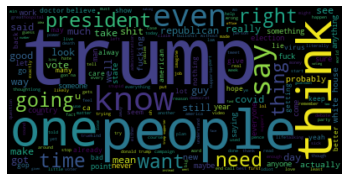

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud().generate(TTC_j)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

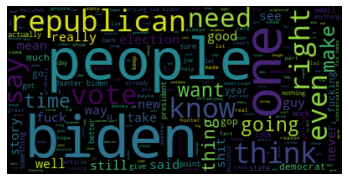

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud().generate(TBC_j)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Week 7 based
## Had to clean tokens, as they werent properly cleaned. This has been fixed at a later date, so one can replace cleaned_tokens with tokens and proceed.

In [10]:
com_data['cleaned_tokens'] = com_data['body'].progress_apply(lambda x: clean_tokens(x))

100%|████████████████████████████████████████████████████████████████████████| 104663/104663 [00:32<00:00, 3203.21it/s]


In [11]:
com_data['date'] = com_data.index
com_data['test'] = com_data['date'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime('%Y-%m-%d'))

In [12]:
documents_per_day = com_data.groupby("test").cleaned_tokens.sum()

In [13]:
for i in tqdm(range(len(documents_per_day))):
    
    #Remove gt's and amp's
    c1 = documents_per_day[i].count('gt')
    c2 = documents_per_day[i].count('amp')
    k = max(c1, c2)
    for j in range(0,k):
        try:
            documents_per_day[i].remove('gt')
            documents_per_day[i].remove('amp')
        except Exception:
            pass
        
    #Remove nothings
    c3 = documents_per_day[i].count('')
    for j in range(0,c3):
        try:
            documents_per_day[i].remove('')
        except Exception:
            pass


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:08<00:00,  4.35it/s]


# Log-scaled for better viewablity.
Here we see the "rule-of-thumb" of having 10,000 tokens per document in order to use dictionary based methods is applicable to the comments data set. (The submissions only contain the article url, and no selftext)

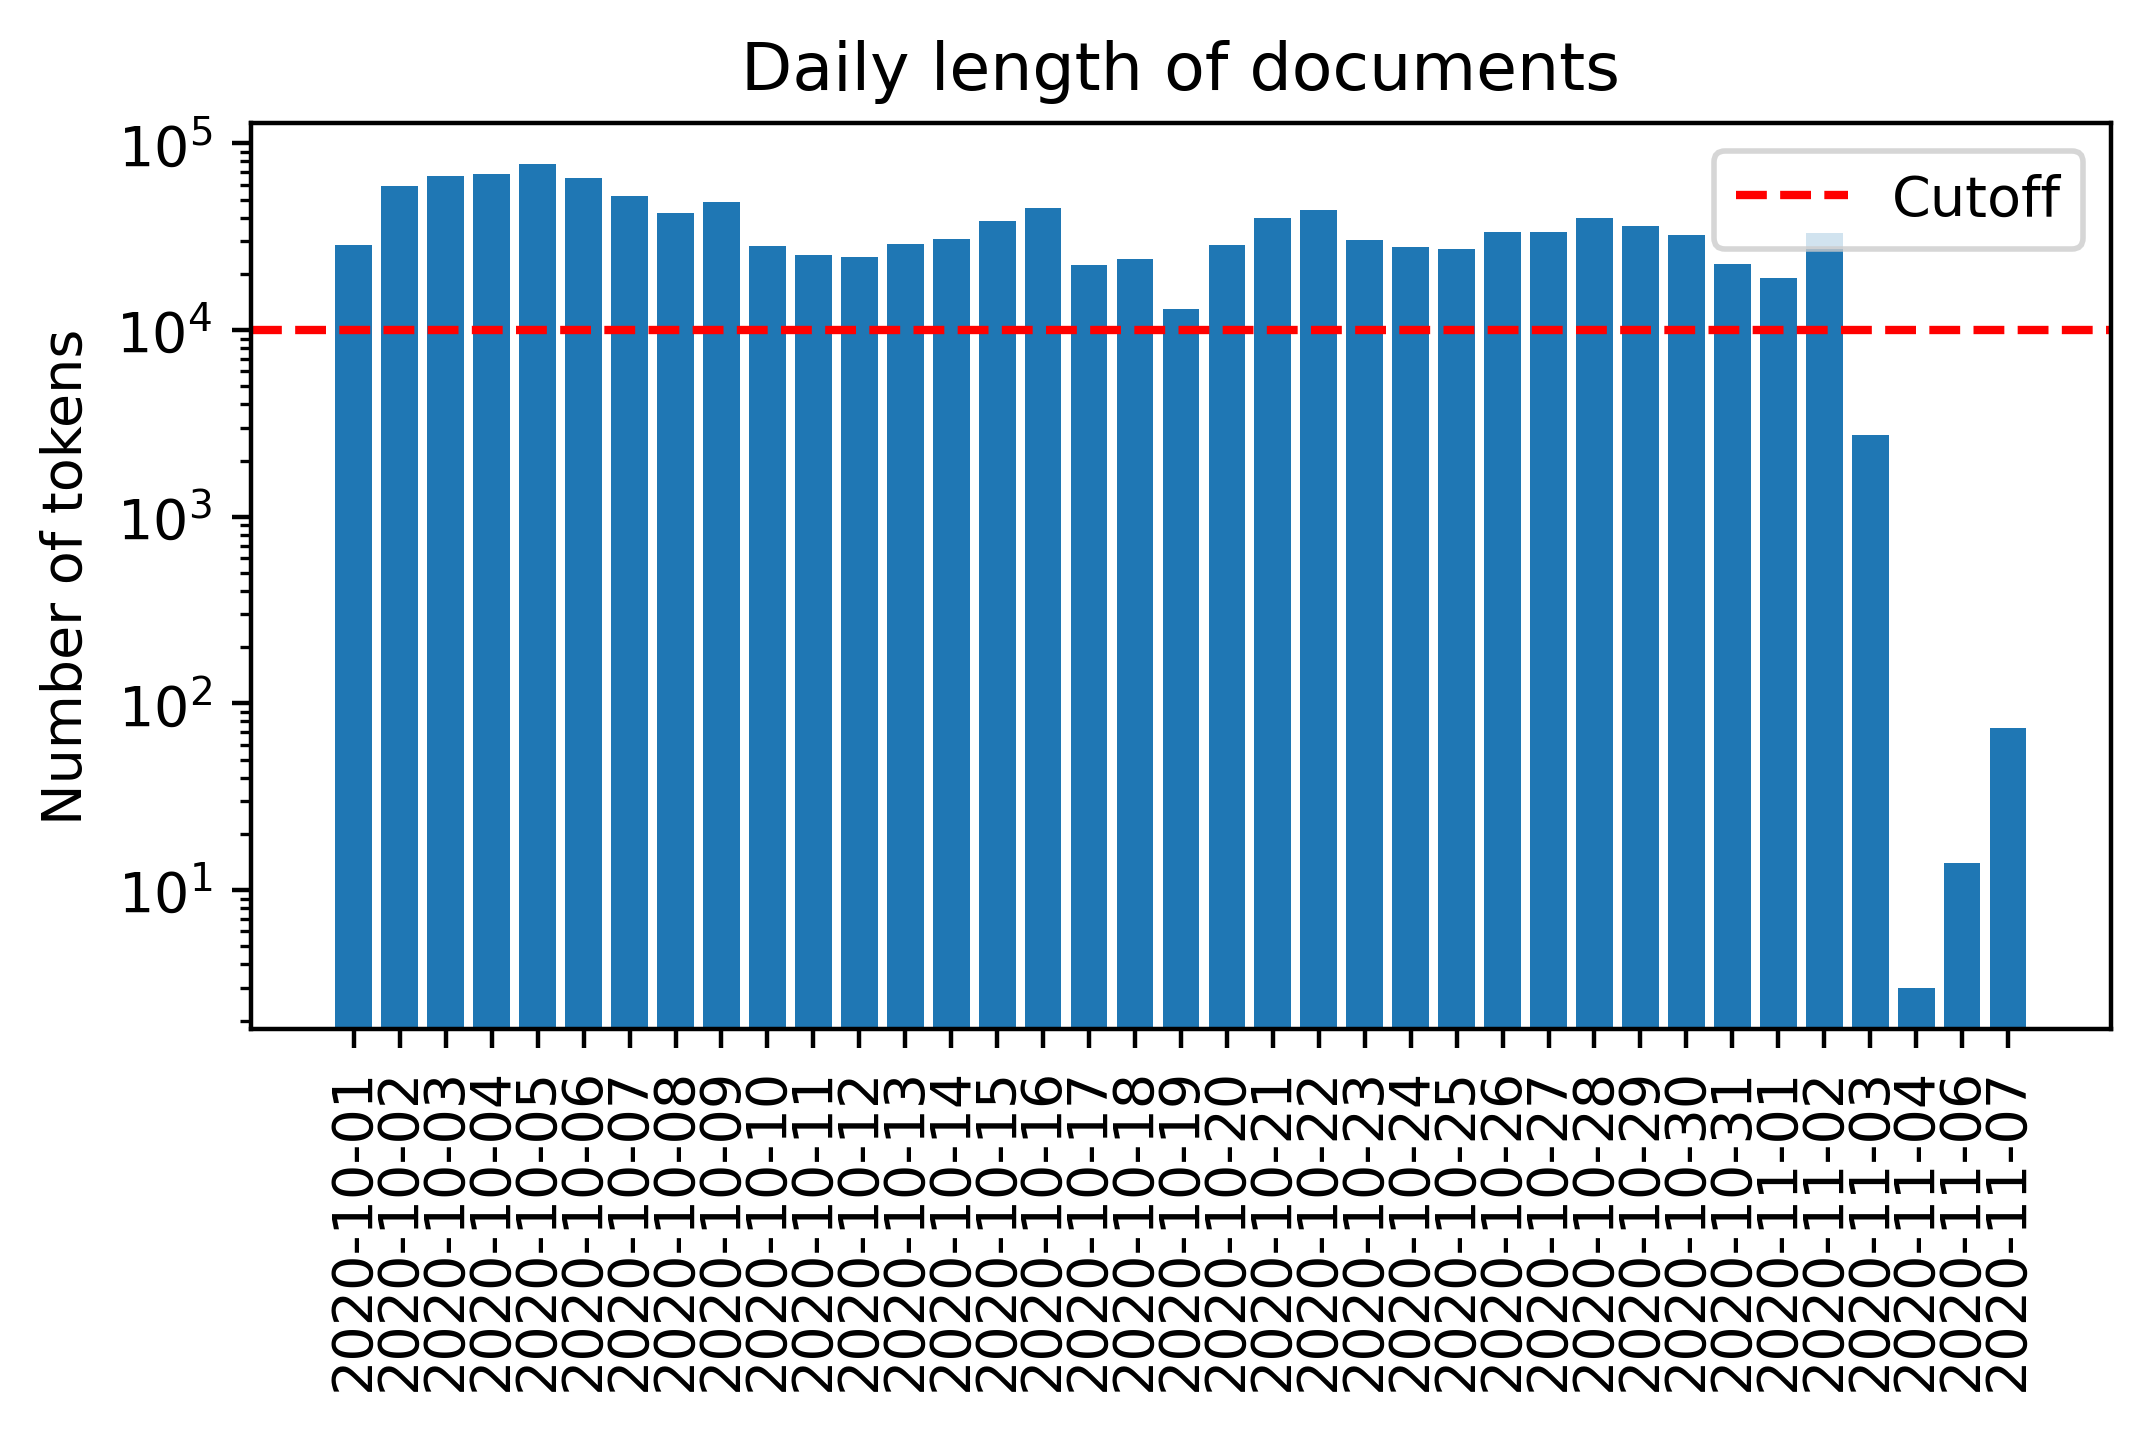

In [14]:
fig, ax = plt.subplots(figsize=(6,3), dpi=400)
plt.xticks(rotation='vertical')
ax.bar(documents_per_day.index, [len(doc) for doc in documents_per_day])
ax.set_title("Daily length of documents")
ax.axhline(10000, color="red", linestyle="dashed", label="Cutoff")
ax.set_ylabel("Number of tokens")
ax.set_yscale('log')
ax.legend()

# Week 7 happiness scores

In [15]:
labMT = pd.read_csv(r"C:\Users\JaQtae\Desktop\SocInfo2022\Hedonometer.csv", index_col="Word")

In [16]:
def hscore(tokens, p=False):
    #Iterative counter
    # If we want print p = True.
    score = 0
    freq_dict = dict(nltk.FreqDist(tokens))
    freq_norm = 0
    for word in tokens:
        # Count for word in dict
        try:
            score += labMT.loc[[word]]["Happiness Score"].values[0] * freq_dict[word]
            freq_norm += freq_dict[word]
        except:
            #Doesnt exist in labMT
            None
    hscore = score / (freq_norm+1e-06) #NaN for 0-division
    if p==True:
        return print("Happiness score: {}".format(hscore))
    else:
        return hscore


In [17]:
temp = com_data.groupby(['test', 'politician']).cleaned_tokens.sum()
for i in tqdm(range(len(temp))):
    c1 = temp[i].count('gt')
    c2 = temp[i].count('amp')
    k = max(c1, c2)
    for j in range(0,k):
        try:
            temp[i].remove('gt')
            temp[i].remove('amp')
        except Exception:
            pass

    c3 = temp[i].count('')
    for j in range(0,c3):
        try:
            temp[i].remove('')
        except Exception:
            pass

100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [00:06<00:00, 10.98it/s]


In [18]:
trump_temp = []
biden_temp = []
ddd = temp.index
#Samler det til et stort corpus for hver kandidat
#Det er vel ikke det vi vil
#Vi vil gerne se på udviklingen af hscore over tid
for k in range(len(temp)):
    if ddd[k].count('Trump') == 1:
        trump_temp.append(temp[k])
    elif ddd[k].count('Biden') == 1:
        biden_temp.append(temp[k])
    else:
        pass
trump_temp = [item for sublist in trump_temp for item in sublist]

In [19]:
P_daily_hscore = temp.progress_apply(lambda x: hscore(x))
P_daily_hscore.index = temp.index

100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [09:16<00:00,  7.73s/it]


In [20]:
# Convert to csv for ease of plotting
#P_daily_hscore.to_csv("P_daily_hscore.csv")

In [21]:
B_hscores = []
T_hscores = []
for q in range(len(P_daily_hscore)):
    if P_daily_hscore.index[q].count('Biden') == 1:
        B_hscores.append(P_daily_hscore[q])
    elif P_daily_hscore.index[q].count('Trump') == 1:
        T_hscores.append(P_daily_hscore[q])
    else:
        pass

In [22]:
len(B_hscores) == len(T_hscores)

True

In [23]:
#At gøre det uden at lave det på samme format som i Week7 er noget møg
#Så laver en dataframe med Bidens happiness scores og en med trumps så de kan plottes hver især
df_B = pd.DataFrame()
df_T = pd.DataFrame()

In [24]:
df_B['B_hscore'] = B_hscores
df_T['T_hscore'] = T_hscores

In [25]:
catcher = []
tester = []
for k in range(len(P_daily_hscore)):
    if P_daily_hscore.index[k].count('Biden') == 1:
        catcher.append(P_daily_hscore.index[k][0])
    elif P_daily_hscore.index[k].count('Trump') == 1:
        tester.append(P_daily_hscore.index[k][0])

In [26]:
#De har ikke samme datoer, det er konflikt efter valgdagen
#Skal måske fjernes fra denne her del af analysen?
length = len(catcher)                    # STEP 1

for i in range(0, length):              # STEP 2
    if catcher[i] != tester[i]:
        print('Conflicting dates at place {} out of {}: {} vs {}'.format(i,length,catcher[i],tester[i]))
    else:
        pass

Conflicting dates at place 34 out of 36: 2020-11-04 vs 2020-11-06


In [27]:
df_B.index = catcher
df_T.index = tester
#df_B.head()

In [28]:
#df_T.head()

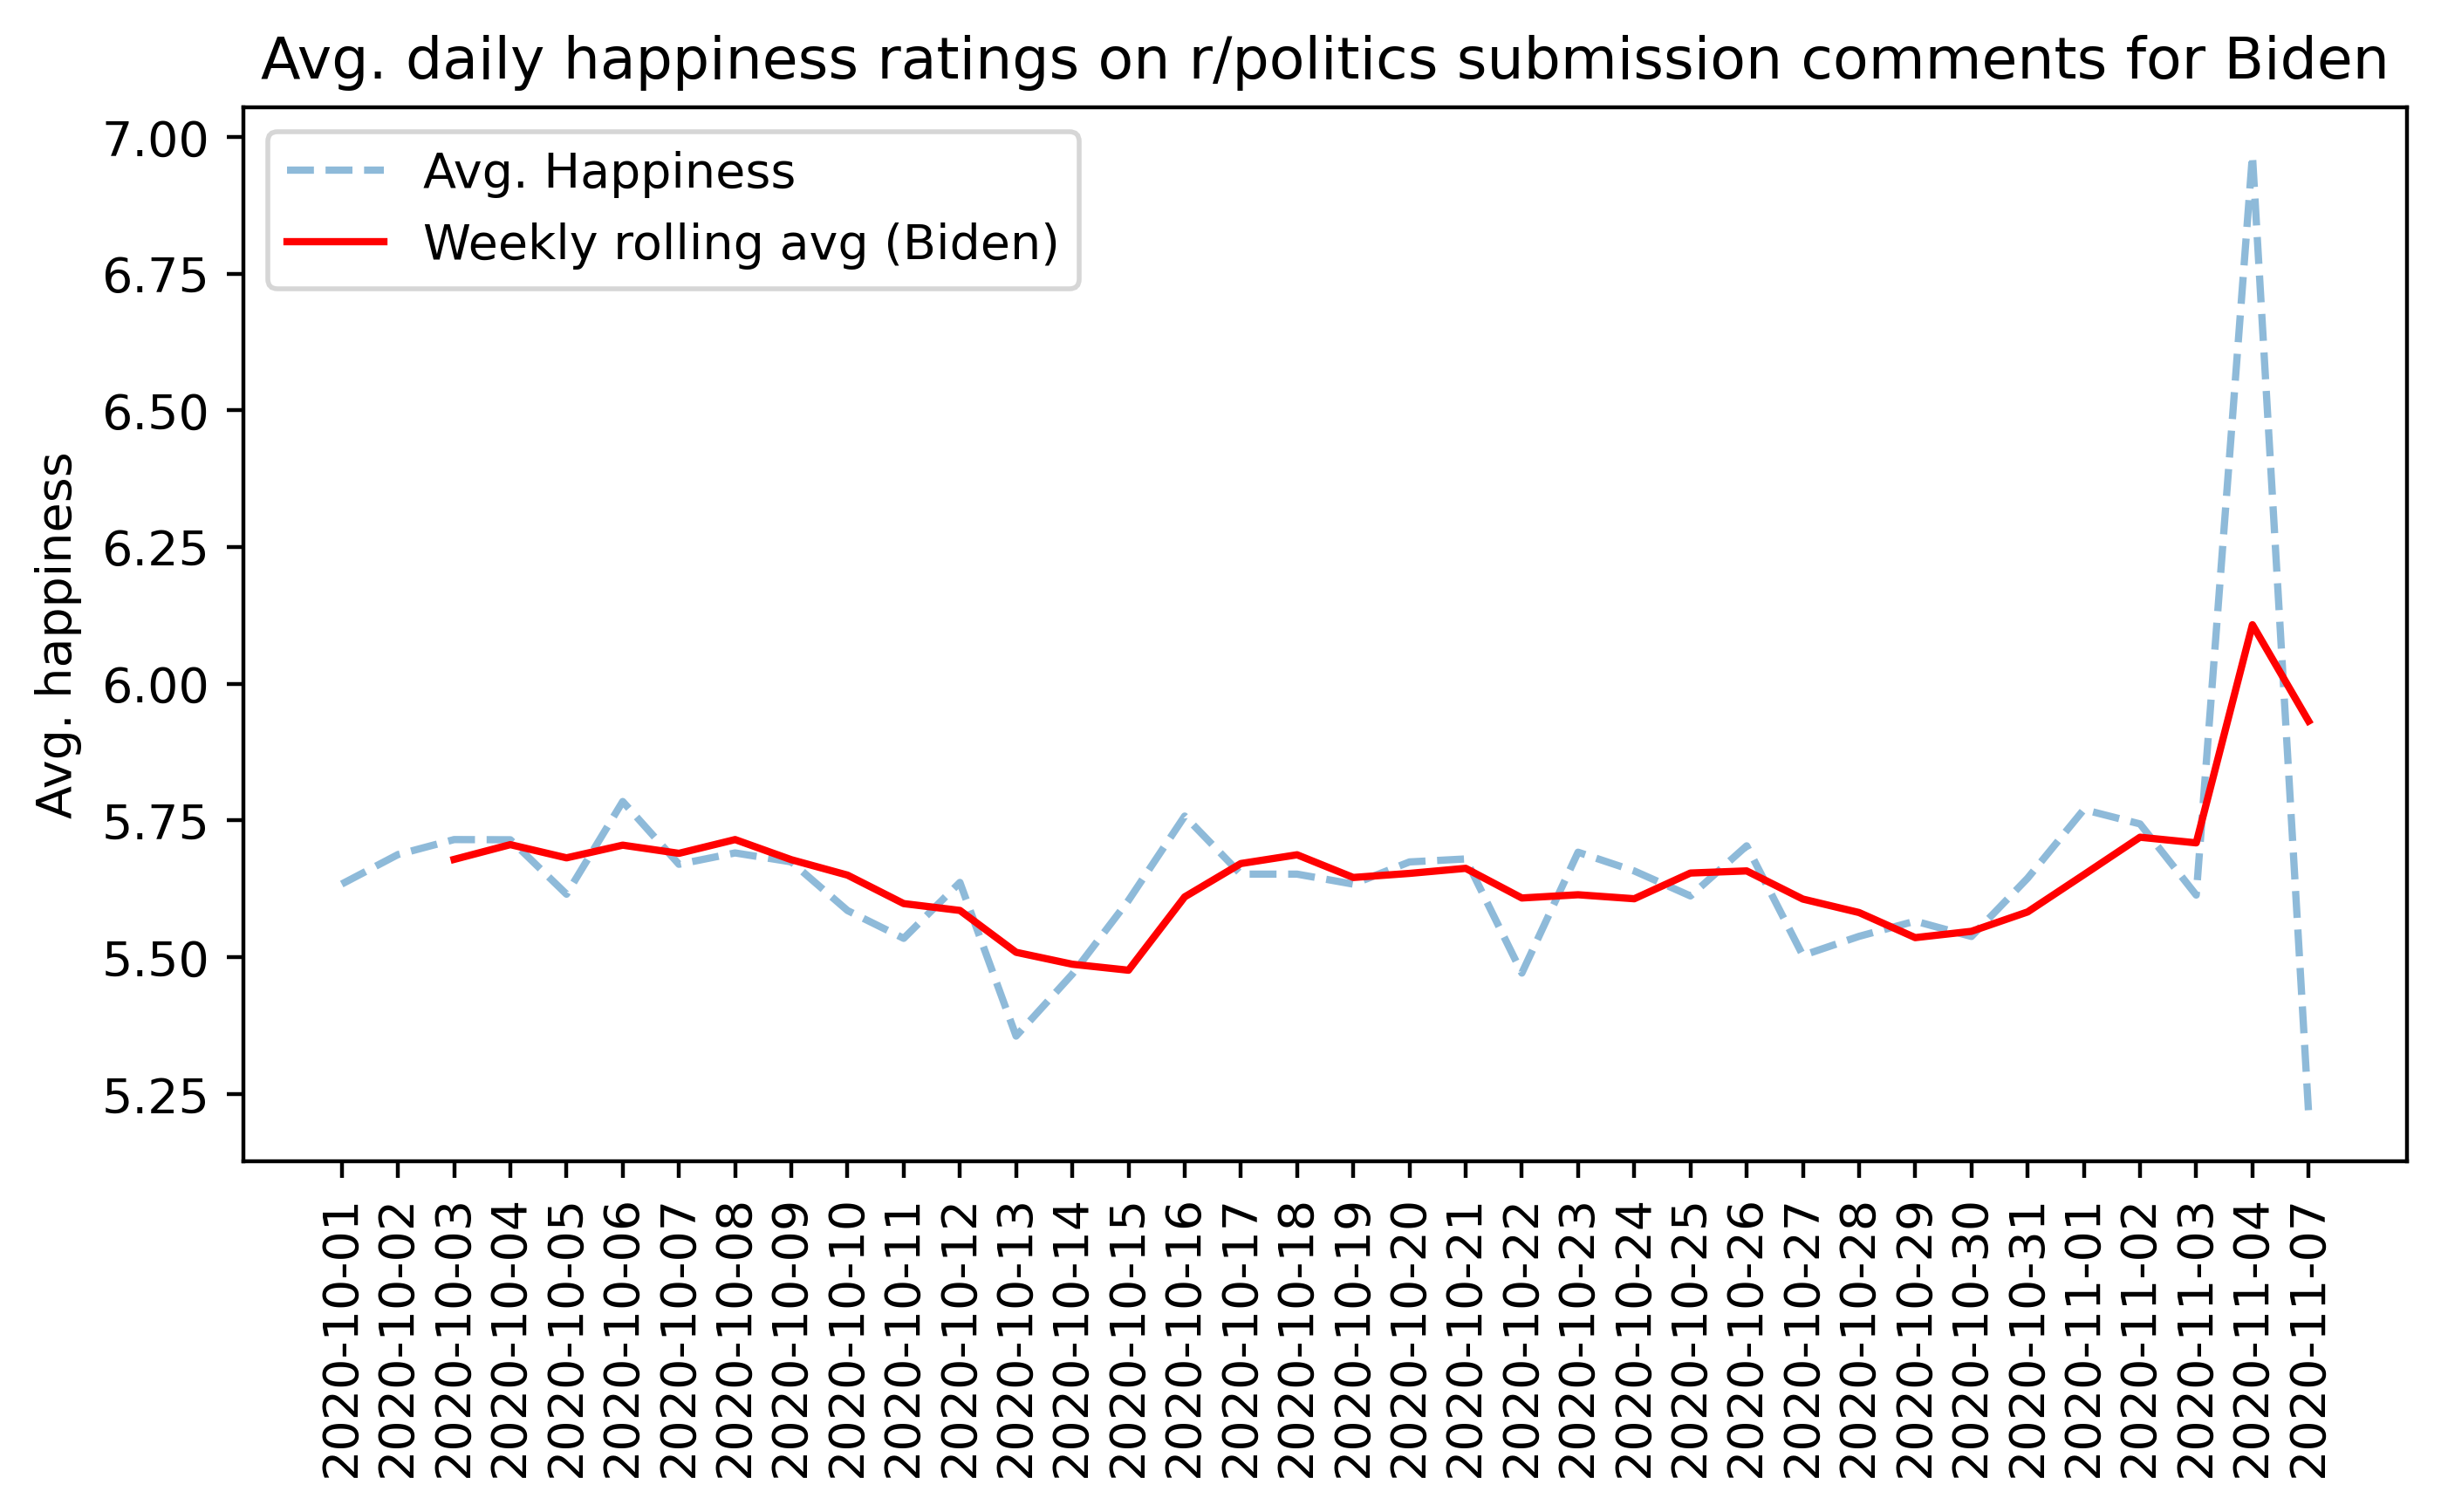

In [29]:
# Reuse from Week 2 including rolling averages
fig, ax = plt.subplots(figsize=(8,4), dpi=400)
plt.xticks(rotation='vertical')
rolling_avg_B = df_B.rolling(3).mean() # 3-day rolling average
ax.plot(df_B.index, df_B, ls = "--", alpha = 0.5, label='Avg. Happiness')
ax.plot(rolling_avg_B.index, rolling_avg_B.values, color = "r", label='Weekly rolling avg (Biden)')
ax.set_title("Avg. daily happiness ratings on r/politics submission comments for Biden")
ax.set_ylabel("Avg. happiness")
ax.legend()
#Kan nok godt bruge en AB-line ved election day
#Spike

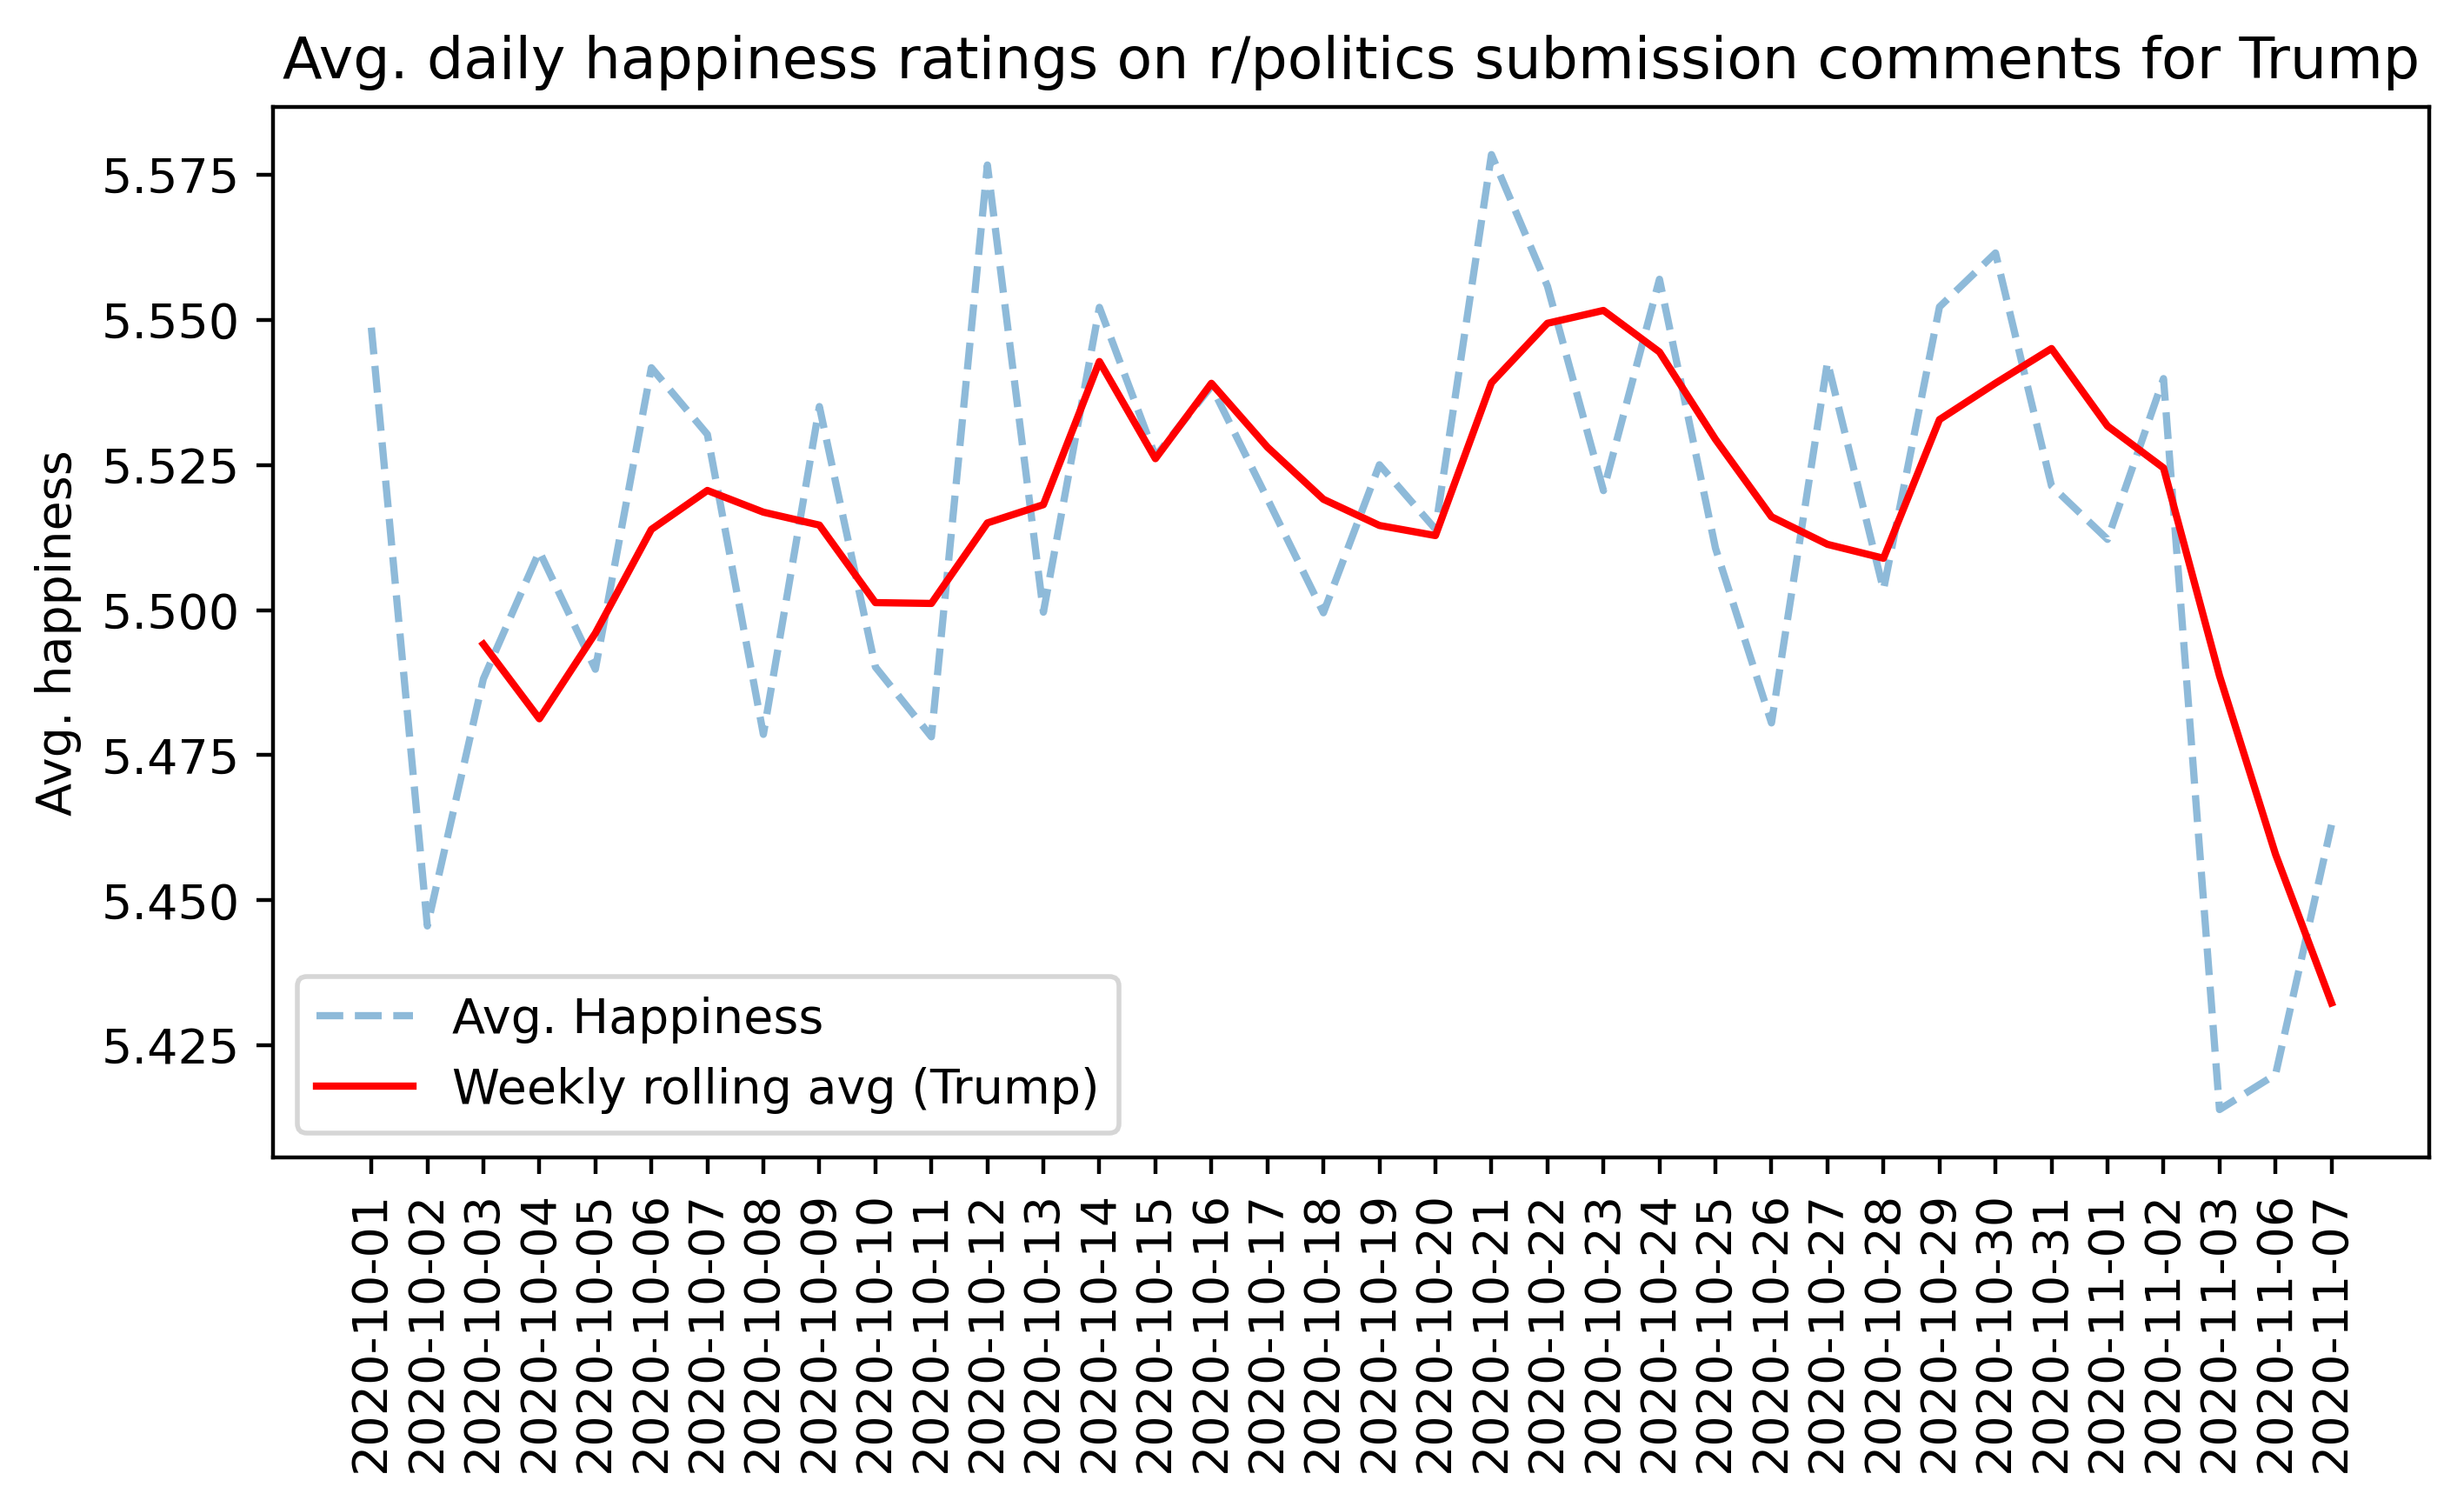

In [30]:
# Reuse from Week 2 including rolling averages
fig, ax = plt.subplots(figsize=(8,4), dpi=400)
plt.xticks(rotation='vertical')
rolling_avg_T = df_T.rolling(3).mean() # 3-day rolling average
ax.plot(df_T.index, df_T, ls = "--", alpha = 0.5, label='Avg. Happiness')
ax.plot(rolling_avg_T.index, rolling_avg_T.values, color = "r", label='Weekly rolling avg (Trump)')
ax.set_title("Avg. daily happiness ratings on r/politics submission comments for Trump")
ax.set_ylabel("Avg. happiness")
ax.legend()
#Kan nok godt bruge en AB-line ved election day
#Spike

# Lexical dispersion plots

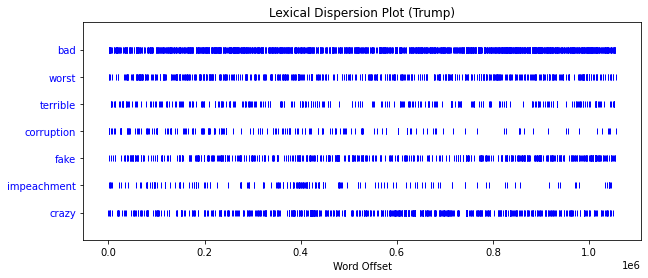

In [31]:
plt.figure(figsize=(10, 4))
targets=['bad','worst','terrible','corruption','fake','impeachment', 'crazy']
dispersion_plot(TTC, targets, ignore_case=True, title='Lexical Dispersion Plot (Trump)')

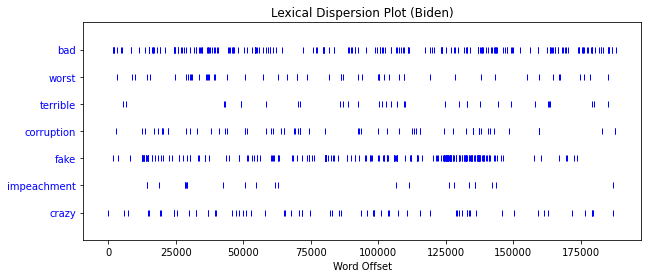

In [32]:
plt.figure(figsize=(10, 4))
targets=['bad','worst','terrible','corruption','fake','impeachment', 'crazy']
dispersion_plot(TBC, targets, ignore_case=True, title='Lexical Dispersion Plot (Biden)')

# Word Shifterator plots

In [33]:
# Election day
election_day = P_daily_hscore.index[-5][0]
print('Election day is: {}'.format(election_day))
d_T = datetime.strptime(P_daily_hscore.index[-5][0], '%Y-%m-%d') #Få det på rigtige format til operations
# Let us view the 33 days of data available before electionday as our reference
d_m = (d_T- dt.timedelta(days=33)).strftime('%Y-%m-%d') #string format
d_m


Election day is: 2020-11-03


'2020-10-01'

In [34]:
l = documents_per_day.loc[election_day]
# for trump
l_ref = np.concatenate(documents_per_day[(documents_per_day.index < election_day) & \
                                (documents_per_day.index > d_m)].values)

In [35]:
p_l = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_lref = dict([(item[0], item[1]/len(l)) for item in Counter(l_ref).items()])
# Looking at top words
sorted(p_lref.items(), key = lambda x:x[1], reverse=True)[:10]

[('trump', 8.267733721353219),
 ('like', 3.6751546016733356),
 ('people', 3.580938523099309),
 ('would', 3.250272826482357),
 ('get', 2.3528555838486724),
 ('one', 2.23463077482721),
 ('going', 1.8992360858493997),
 ('even', 1.840669334303383),
 ('think', 1.8384867224445254),
 ('president', 1.7606402328119317)]

In [36]:
#Folk snakker rigtig meget om trump og people og voting både på dagen og før, men election på election day
# Tror det er fint? Synes det er lidt weird tho - Jakob
sorted(p_l.items(), key = lambda x:x[1], reverse=True)[:10]

[('trump', 0.01709712622771917),
 ('would', 0.011276827937431793),
 ('like', 0.009821753364859949),
 ('people', 0.008366678792288106),
 ('prison', 0.0061840669334303384),
 ('right', 0.005820298290287377),
 ('go', 0.005456529647144416),
 ('vote', 0.005456529647144416),
 ('think', 0.004728992360858494),
 ('get', 0.004728992360858494)]

In [37]:
# [(token, diff(p_l, p_lref))]
# Do it for every word in the union of sets of words for corpora
d_p = dict([(token, p_l.get(token, 0) -  p_lref.get(token, 0)) \
               for token in set(p_l.keys()).union(set(p_lref.keys()))])
sorted(d_p.items(), key = lambda x:x[1], reverse=True)[:10]

[('prepaid', 0.000727537286285922),
 ('retrospectively', 0.0003637686431429611),
 ('fencing', 0.0003637686431429611),
 ('scratched', 0.0003637686431429611),
 ('mcdonnell', 0.0003637686431429611),
 ('carta', 0.0003637686431429611),
 ('robotman', 0.0003637686431429611),
 ('rebelled', 0.0003637686431429611),
 ('streep', 0.0003637686431429611),
 ('ethnics', 0.0003637686431429611)]

In [38]:
labMT_dict = pd.Series(labMT["Happiness Score"].values, index=labMT.index).to_dict()

prep_hscore =  dict([(token, labMT_dict.get(token, np.nan)-5) for token in set(p_l.keys()).union(set(p_lref.keys()))])
#Product
d_phi = dict([(token, prep_hscore[token]*d_p[token]) for token in set(p_l.keys()).union(set(p_lref.keys()))\
                    if not np.isnan(prep_hscore[token])]) #Do it for everything that isn't NaN

# Absolute value sorting top 10
sorted(d_phi.items(), key = lambda x: np.abs(x[1]), reverse=True)[:10]

[('like', -8.137038923244814),
 ('people', -4.144183339396145),
 ('covid', 4.133430338304838),
 ('shit', 2.735540196435067),
 ('good', -2.512113495816661),
 ('trump', -2.4751909785376482),
 ('right', -2.3035576573299386),
 ('think', -2.2005092761004006),
 ('get', -2.160276464168789),
 ('well', -2.0381229538013823)]

C:\Users\JaQtae\anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


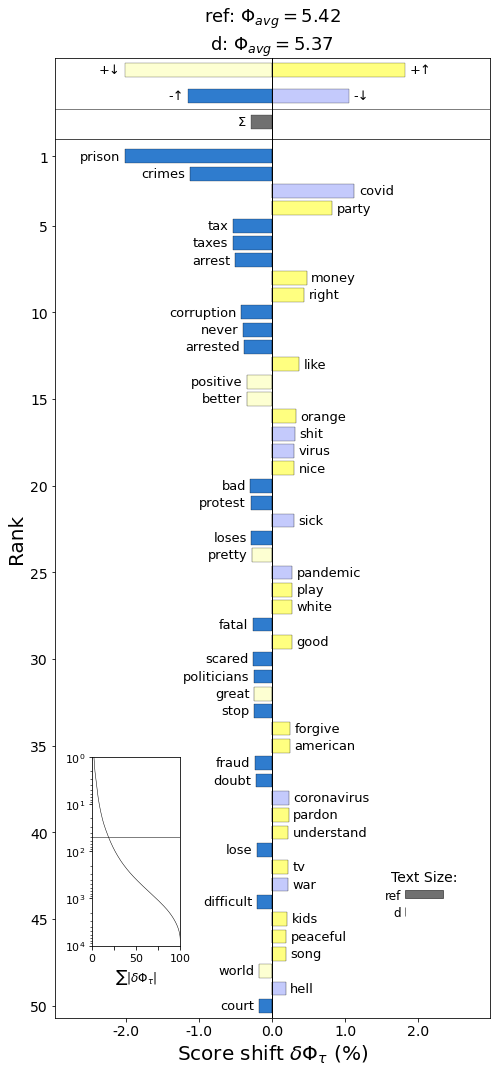

<AxesSubplot:title={'center':'ref: $\\Phi_{avg}=$5.42\nd: $\\Phi_{avg}=$5.37'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [39]:
import shifterator as sft
senti_shift = sft.WeightedAvgShift(type2freq_1 = p_lref,
                                     type2freq_2 = p_l,
                                     type2score_1 = labMT_dict,
                                     reference_value = 5)
senti_shift.get_shift_graph(detailed = True,
                            system_names = ['ref', 'd'])